In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# Step 1: Load Dataset
train_df = pd.read_csv("C:\\SEM-4\\MachineLearning_LAB\\lab7_train.csv")  # Load training data
test_df = pd.read_csv("C:\\SEM-4\\MachineLearning_LAB\\lab7_test.csv")    # Load test data 

In [8]:
# Step 2: Preprocess Data
X = train_df.iloc[:, 1:].values  # Extract pixel values
y = train_df.iloc[:, 0].values   # Extract labels (digits)

In [9]:
# Normalize the pixel values (0-255 -> 0-1 scaling)
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [11]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Step 3: Train SVM Model (RBF Kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [14]:
# Step 4: Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(X_train, y_train)

c:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [15]:
# Step 5: Make Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# Step 6: Evaluate Models
print("\n🔹 Support Vector Machine (SVM) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


🔹 Support Vector Machine (SVM) Evaluation:
Accuracy: 0.9573
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.98      0.99      0.98       937
           2       0.91      0.97      0.94       835
           3       0.95      0.93      0.94       870
           4       0.97      0.96      0.96       814
           5       0.95      0.93      0.94       759
           6       0.98      0.97      0.97       827
           7       0.96      0.96      0.96       880
           8       0.96      0.94      0.95       813
           9       0.95      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [18]:
print("\n🔹 Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))


🔹 Logistic Regression Evaluation:
Accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       827
           1       0.93      0.97      0.95       937
           2       0.89      0.88      0.88       835
           3       0.89      0.87      0.88       870
           4       0.92      0.89      0.90       814
           5       0.85      0.85      0.85       759
           6       0.93      0.94      0.93       827
           7       0.93      0.93      0.93       880
           8       0.87      0.84      0.85       813
           9       0.87      0.89      0.88       838

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [19]:
# Confusion Matrices
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [20]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

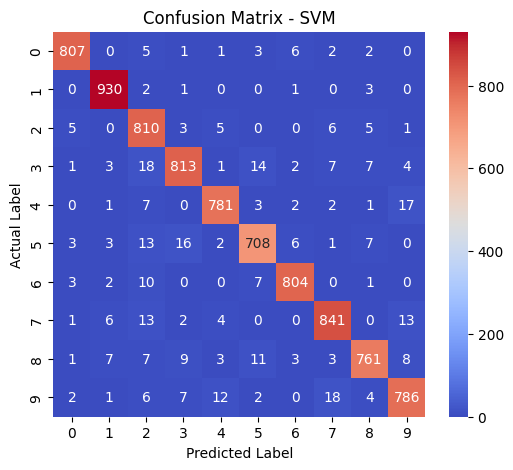

In [21]:
# Step 7: Visualizations

# Plot 1: SVM Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - SVM")
plt.show()

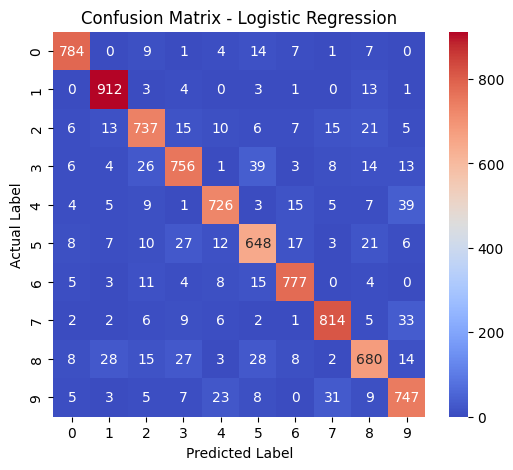

In [22]:
# Plot 2: Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_21116\3529323621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


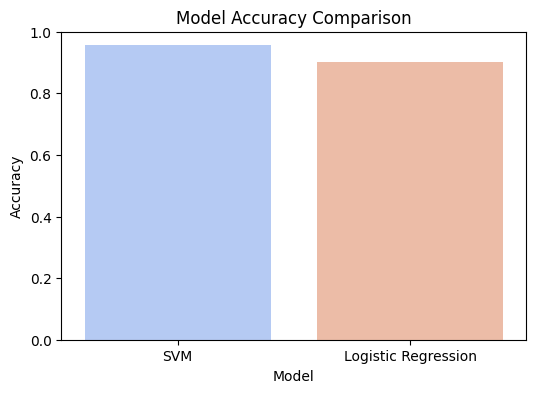

In [23]:
# Plot 3: Accuracy Comparison
models = ["SVM", "Logistic Regression"]
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_log_reg)]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [24]:
# Step 8: Predict on `test.csv`
X_test= scaler.transform(test_df.values)  # Normalize test images
y_pred_test_svm = svm_model.predict(X_test)  # Predict using SVM

In [25]:
# Step 9: Create Submission File
submission_df = pd.DataFrame({"ImageId": np.arange(1, len(y_pred_test_svm) + 1), "Label": y_pred_test_svm})
submission_df.to_csv("submission.csv", index=False)
print("✅ Submission File Created: submission.csv")

✅ Submission File Created: submission.csv
